### TEST: Can player position adaptability be quantified appropriately?
Examine the data:

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 6)

In [3]:
# load data
appearances_full = pd.read_csv('supporting-files/baseballdatabank-2017/core/Appearances.csv')
appearances_full

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,NaN,1,1,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN
1,1871,RC1,NaN,addybo01,25,NaN,25,25,0,0,0,22,0,3,0,0,0,0,NaN,NaN,NaN
2,1871,CL1,NaN,allisar01,29,NaN,29,29,0,0,0,2,0,0,0,29,0,29,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102758,2016,CHN,NL,zobribe01,147,142.0,147,146,0,0,1,119,0,1,27,0,24,46,0.0,4.0,0.0
102759,2016,SEA,AL,zuninmi01,55,48.0,55,52,0,52,0,0,0,0,0,0,0,0,2.0,3.0,0.0
102760,2016,SEA,AL,zychto01,12,0.0,0,12,12,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0


Fields are:
* yearID:         Year
* teamID:         Team
* lgID:           League
* playerID:       Player ID code
* G_all:          Total games played
* GS:             Games started
* G_batting:      Games in which player batted
* G_defense:      Games in which player appeared on defense
* G_p:            Games as pitcher
* G_c:            Games as catcher
* G_1b:           Games as firstbaseman
* G_2b:           Games as secondbaseman
* G_3b:           Games as thirdbaseman
* G_ss:           Games as shortstop
* G_lf:           Games as leftfielder
* G_cf:           Games as centerfielder
* G_rf:           Games as right fielder
* G_of:           Games as outfielder
* G_dh:           Games as designated hitter
* G_ph:           Games as pinch hitter
* G_pr:           Games as pinch runner

It appears a player may have multiple rows corresponding to the appearances for the given year. G_all doesn't necessarily have to be the sum of all the appearances for that year. For example, a player may have switched positions at some point in the game.

In [4]:
# count rows
rows_table = len(appearances_full.index)

There are {{rows_table}} rows in the table. The appearances for all years in a player's career need to be summed up and collapsed into a single row. Doing this will drop all non-numerical fields. The only irrelevant field is now yearID, which will be dropped manually.

In [6]:
# collapse and sum by player ID
appearances = appearances_full.groupby(appearances_full.playerID).sum()

# drop yearID column
appearances = appearances.drop('yearID', axis=1)
appearances

,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
playerID,,,,,,,,,,,,,,,,,
aardsda01,331,0.0,139,331,331,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
aaronha01,3298,3173.0,3298,2985,0,0,210,43,7,0,315,308,2174,2760,201.0,122.0,1.0
aaronto01,437,206.0,437,346,0,0,232,7,10,0,135,1,2,137,0.0,102.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuverge01,266,31.0,266,265,265,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0
zwilldu01,366,310.0,366,339,0,0,3,0,0,0,0,334,4,338,0.0,24.0,1.0
zychto01,25,1.0,0,25,25,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0


In [7]:
# count rows
rows_table = len(appearances.index)
rows_table

18912

There are now {{rows_table}} rows in the table. Player adaptability score is calculated by looking at the nine possible positions field-positions in baseball. For each player's total appearances, it is three minus the standard deviation (unbiased estimator, s-hat) divided by the mean.

$$\text{Player Position Adaptability } = 3-\frac{\hat{s}}{\mu}$$

In [10]:
# create player position adaptability score
positions = ['G_p','G_c','G_1b','G_2b','G_3b','G_ss','G_lf','G_cf','G_rf']
appearances['adapt_score'] = 3 - round((appearances[positions].std(axis=1, ddof=1)/appearances[positions].mean(axis=1)),4)

# total apperances
appearances

,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,adapt_score
playerID,,,,,,,,,,,,,,,,,,
aardsda01,331,0.0,139,331,331,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000
aaronha01,3298,3173.0,3298,2985,0,0,210,43,7,0,315,308,2174,2760,201.0,122.0,1.0,0.9371
aaronto01,437,206.0,437,346,0,0,232,7,10,0,135,1,2,137,0.0,102.0,35.0,1.0619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuverge01,266,31.0,266,265,265,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0000
zwilldu01,366,310.0,366,339,0,0,3,0,0,0,0,334,4,338,0.0,24.0,1.0,0.0690
zychto01,25,1.0,0,25,25,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000


##### Manually check calculation

In [11]:
player = appearances.loc['aardsda01']
player

G_all          331.0
GS               0.0
G_batting      139.0
               ...  
G_ph             0.0
G_pr             0.0
adapt_score      0.0
Name: aardsda01, dtype: float64

In [12]:
mean = (player[4:13].sum()) / 9
mean

36.77777777777778

In [13]:
top = (331 - mean)**2 + 8 * mean**2
top

97387.55555555556

In [14]:
descrim = top / 8
descrim

12173.444444444445

In [15]:
import math
stdev = math.sqrt(descrim)
stdev

110.33333333333334

In [16]:
3 - (stdev/mean)

0.0

In [17]:
# check for adaptabilty scores that were not computed
# note, if player never made on-field appearance(like for pinch hitters), formula will be undefined
rows_count = len(appearances.index)
adapt_nan = appearances['adapt_score'].isnull().sum()
print("Rows in table: %s" %rows_count)
print("Player position adaptability scores not computed: %s" %adapt_nan)

Rows in table: 18912
Player position adaptability scores not computed: 203


In [19]:
# remove any players who never made on-field appearances
appearances.dropna(subset=['adapt_score'], inplace=True)
appearances

,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,adapt_score
playerID,,,,,,,,,,,,,,,,,,
aardsda01,331,0.0,139,331,331,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000
aaronha01,3298,3173.0,3298,2985,0,0,210,43,7,0,315,308,2174,2760,201.0,122.0,1.0,0.9371
aaronto01,437,206.0,437,346,0,0,232,7,10,0,135,1,2,137,0.0,102.0,35.0,1.0619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuverge01,266,31.0,266,265,265,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0000
zwilldu01,366,310.0,366,339,0,0,3,0,0,0,0,334,4,338,0.0,24.0,1.0,0.0690
zychto01,25,1.0,0,25,25,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000


In [20]:
# check again for adaptabilty scores that were not computed
rows_count = len(appearances.index)
adapt_nan = appearances['adapt_score'].isnull().sum()
print("Rows in the table: %s" %rows_count)
print("Player position adaptability scores not computed: %s" %adapt_nan)

Rows in the table: 18709
Player position adaptability scores not computed: 0


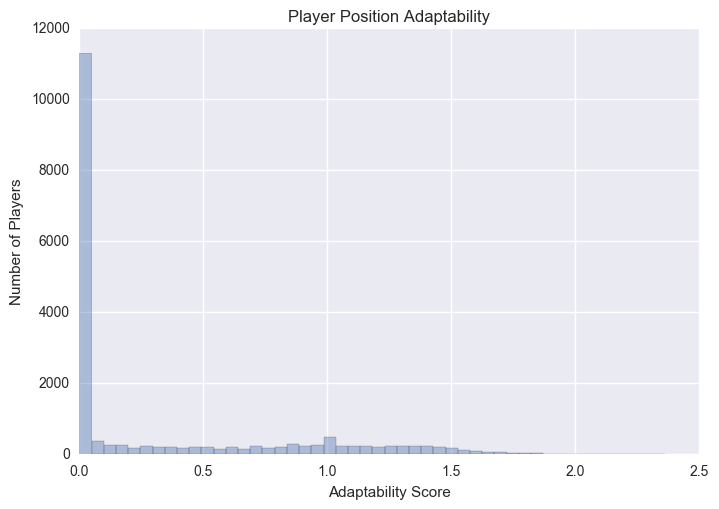

In [21]:
# plot
import seaborn as sns
import matplotlib.pyplot as plt

adapt_score = appearances['adapt_score']
fig, ax = plt.subplots()
sns.distplot(adapt_score, ax=ax, kde=False)
ax.set_title("Player Position Adaptability")
ax.set_ylabel("Number of Players")
ax.set_xlabel("Adaptability Score")

plt.show()

### Test: plot adaptability score against another variable

In [22]:
# load all-star table
allstar_full = pd.read_csv('supporting-files/baseballdatabank-2017/core/AllstarFull.csv')

# create 1 for appeared
allstar_full['appeared'] = 1
allstar_full.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos,appeared
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0,1
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0,1
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0,1
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0,1
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0,1


In [23]:
# collapse and sum by player ID
allstar = allstar_full.groupby(allstar_full.playerID).sum()
allstar.head()

,yearID,gameNum,GP,startingPos,appeared
playerID,,,,,
aaronha01,49107,12,24.0,144.0,25
aasedo01,1986,0,1.0,NaN,1
abreubo01,4009,0,2.0,9.0,2
abreujo02,2014,0,1.0,NaN,1
adamsac01,1943,0,0.0,NaN,1


In [24]:
# concatenate the two dataframes
merged = pd.concat([appearances, allstar], axis=1)
merged.head()

,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,adapt_score,yearID,gameNum,GP,startingPos,appeared
aardsda01,331,0.0,139,331,331,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,NaN,NaN,NaN,NaN,NaN
aaronha01,3298,3173.0,3298,2985,0,0,210,43,7,0,315,308,2174,2760,201.0,122.0,1.0,0.9371,49107.0,12.0,24.0,144.0,25.0
aaronto01,437,206.0,437,346,0,0,232,7,10,0,135,1,2,137,0.0,102.0,35.0,1.0619,NaN,NaN,NaN,NaN,NaN
aasedo01,448,91.0,81,448,448,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,1986.0,0.0,1.0,NaN,1.0
abadan01,15,4.0,15,9,0,0,8,0,0,0,0,0,1,1,0.0,7.0,1.0,0.3542,NaN,NaN,NaN,NaN,NaN


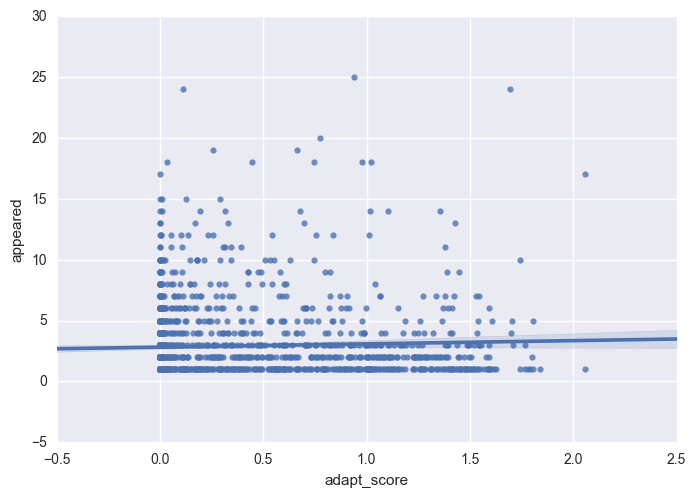

In [25]:
# test plot
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.regplot(x='adapt_score', y='appeared', data=merged)
plt.show()

In [ ]:
merged.to_csv('merged.csv')

In [26]:
# try dropping NaN in appeared
merged.dropna(subset=['appeared'], inplace=True)
merged

,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,adapt_score,yearID,gameNum,GP,startingPos,appeared
aaronha01,3298,3173.0,3298,2985,0,0,210,43,7,0,315,308,2174,2760,201.0,122.0,1.0,0.9371,49107.0,12.0,24.0,144.0,25.0
aasedo01,448,91.0,81,448,448,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,1986.0,0.0,1.0,NaN,1.0
abreubo01,2425,2248.0,2425,2138,0,0,0,0,0,0,142,21,1990,2138,161.0,155.0,3.0,0.2486,4009.0,0.0,2.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ziskri01,1453,1338.0,1453,904,0,0,0,0,0,0,415,0,503,904,474.0,101.0,0.0,1.0040,3955.0,0.0,2.0,16.0,2.0
zitoba01,434,421.0,213,433,433,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0000,6011.0,0.0,2.0,NaN,3.0
zobribe01,1337,1277.0,1337,1299,0,0,18,735,8,230,138,34,360,499,26.0,45.0,4.0,1.5441,6038.0,0.0,2.0,4.0,3.0


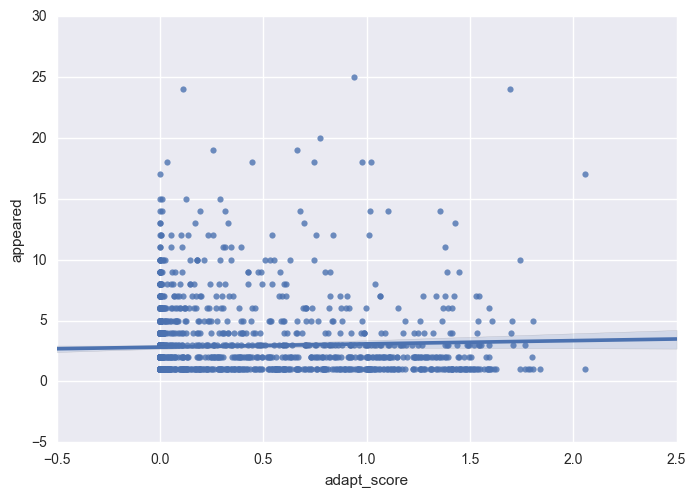

In [27]:
# test plot2
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.regplot(x='adapt_score', y='appeared', data=merged)
plt.show()

In [28]:
# doesn'tchange the scatter plot
merged.to_csv('merged2.csv')

Doesn't seem to be a correlation

In [29]:
# try awards

# merge player and manager awards
awards_managers = pd.read_csv('supporting-files/baseballdatabank-2017/core/AwardsManagers.csv')
awards_players = pd.read_csv('supporting-files/baseballdatabank-2017/core/AwardsPlayers.csv')
awards_full = pd.concat([awards_managers, awards_players])
awards_full.head()

,playerID,awardID,yearID,lgID,tie,notes
0,larusto01,BBWAA Manager of the Year,1983,AL,NaN,NaN
1,lasorto01,BBWAA Manager of the Year,1983,NL,NaN,NaN
2,andersp01,BBWAA Manager of the Year,1984,AL,NaN,NaN
3,freyji99,BBWAA Manager of the Year,1984,NL,NaN,NaN
4,coxbo01,BBWAA Manager of the Year,1985,AL,NaN,NaN


In [30]:
awards_full['awarded'] = 1
awards = awards_full.groupby(awards_full.playerID).sum()
awards.head()

,yearID,awarded
playerID,,
aaronha01,31401,16
abbotji01,3986,2
abernte02,3932,2
abreubo01,4009,2
abreujo02,4028,2


In [31]:
awards.to_csv('awards.csv')

In [32]:
# merge appearances and awards
appear_award_merged = pd.concat([appearances, awards], axis=1)
appear_award_merged[['awarded']] = appear_award_merged[['awarded']].fillna(value=0)
appear_award_merged.head()

,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,adapt_score,yearID,awarded
aardsda01,331.0,0.0,139.0,331.0,331.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,NaN,0.0
aaronha01,3298.0,3173.0,3298.0,2985.0,0.0,0.0,210.0,43.0,7.0,0.0,315.0,308.0,2174.0,2760.0,201.0,122.0,1.0,0.9371,31401.0,16.0
aaronto01,437.0,206.0,437.0,346.0,0.0,0.0,232.0,7.0,10.0,0.0,135.0,1.0,2.0,137.0,0.0,102.0,35.0,1.0619,NaN,0.0
aasedo01,448.0,91.0,81.0,448.0,448.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,NaN,0.0
abadan01,15.0,4.0,15.0,9.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,1.0,0.3542,NaN,0.0


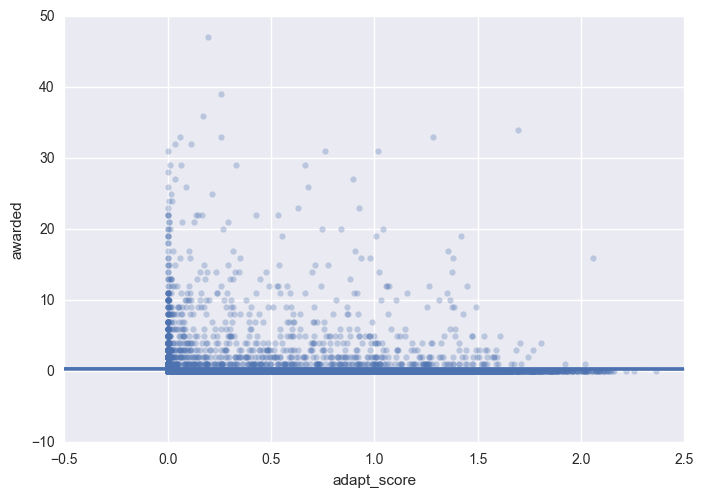

In [40]:
# plot
ax = sns.regplot(x='adapt_score', y='awarded', data=appear_award_merged, scatter_kws={'alpha':0.3})
plt.show()

In [ ]:
appear_award_merged.to_csv('appear_award.csv')

### Try Salary

In [ ]:
# load salary
salary_full = pd.read_csv('supporting-files/baseballdatabank-2017/core/Salaries.csv')
salary_full.head()

In [ ]:
# merge
merged_salary = pd.concat([appearances,salary_full], axis=1)

# dropna
# merged_salary.dropna(subset=['salary'], inplace=True)
merged_salary.head()

In [ ]:
merged_salary.to_csv('merged_salary.csv')

In [ ]:
ax = sns.regplot(x='adapt_score', y='salary', data=merged_salary)
plt.show()